# Simple returns vs log returns

The simple return simply sums up all the changes and divides it by the number of returns.
However, with percent returns, the negative returns have more weight against positive returns because negative returns reduce the total amount and that affects the same positive return yield less:
- 50% down and 100% up = original value
Also, negative return will take away more in absolute value, if there has been some positive return.
- 100% up and 50% down = original value

Because the returns are the constant/periodic "growth" of the principal, it is not accurate if we divide the return by the number of periods in order to get the mean return:
- $100 becomes $112 after 1 year. Is monthly return 12% / 12 = 1%?
- 100 * (1.01)^12 = 112.68250301319698
- The monthly return should be less than 1% because it's compounding over periods.

The difference gets bigger when the number of compounding periods gets larger:
- $100 becomes $365 after 1 year. Is daily return 365% / 365 = 1%?
- 100 * (1.01)**365 = 3778.343433288728

The mean log return would've returned:
- ln(3.65) / 365 = 0.0035471977194367127 -> 0.35% daily return

With the mean daily log return, we can calculate the ending value correctly:
```py
daily_log_return = np.log(3.65) / 365
100 * np.exp(daily_log_return * 365) # 365.0 
```

When the number of compounding gets large enough (in this case, 365), log return becomes close enough to the actual return:
```py
daily_log_return = np.log(3.65) / 365
100 * (daily_log_return+1)**365 # 364.1647746788047
```

However, log return assumes continuous compounding and most financial institute pays interest based on the yearly interest. (ie. the monthly payouts are meant to be compounded into that rate after 1 year period)

So unless we're dealing with very short periods of time (typically less than 1 day), or doing some testing that requires accuracy, we can use simple return.  

In [57]:
daily_log_return = np.log(3.65) / 365
100 * (daily_log_return+1)**365

364.1647746788047

In [1]:
import pandas as pd
import numpy as np

In [14]:
np.e

2.718281828459045

In [25]:

# np.log takes log of base e
np.log(np.e)

1.0

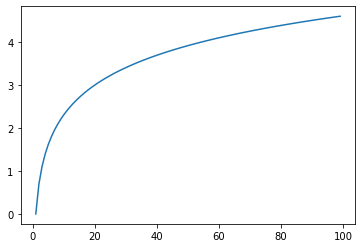

In [23]:
# If you take the log of an arithmetic series, 
# the rate of change for y value will decrease
xs = [x for x in range(1, 100)]
ys = np.log(xs)

import matplotlib.pyplot as plt
plt.plot(xs, ys)
plt.show()

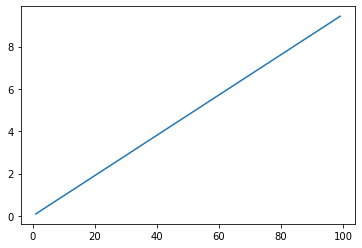

In [42]:
# If you take the log of exponential series, the rate of change stays constant.
# linear line shows that it's growing at the constant rate of 1.1
ys = np.log([1.1**x for x in xs])
plt.plot(xs, ys)

In [45]:
# takes 0 period to reach the original amount
np.log(1)

0.0

In [46]:
# with the constant growth, it takes about 69% of what periodic growth might have taken to reach 2 times of the mass.
np.log(2)

0.6931471805599453

In [47]:
np.log(0.5)

-0.6931471805599453

In [2]:
df = pd.DataFrame(index=[2018, 2019, 2020], columns=['price'], data=[100, 50, 95])
df

,price
2018,100
2019,50
2020,95


In [3]:
simple_returns = df.pct_change().dropna()
simple_returns

,price
2019,-0.5
2020,0.9


In [5]:
# average return is positive although we ended up with less.
mean_return = simple_returns.mean()
mean_return

price    0.2
dtype: float64

In [7]:
# we should've had 144 after 2 years with this annual return
100 * (mean_return + 1) ** 2

price    144.0
dtype: float64

In [26]:
df

,price
2018,100
2019,50
2020,95


In [28]:
log_returns = np.log(df / df.shift(1)).dropna()
log_returns

,price
2019,-0.693147
2020,0.641854


In [30]:
# The mean of log return represents how much it grew over one period on average.
log_returns.mean()

price   -0.025647
dtype: float64

In [32]:
log_returns

,price
2019,-0.693147
2020,0.641854


In [37]:
# with average log returns, we can calculate today's value
power_of_e_to_get_to_95_pct = log_returns.mean() * log_returns.count()
final_return_to_principle = np.exp(power_of_e_to_get_to_95_pct)
final_return_to_principle

price    0.95
dtype: float64